In [1]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<p  style="color:cyan;"> Emil Bluemax : PES2UG20CS431 <br> J P Daniel Christopher : PES2UG20CS433 <br> Aditya Khot : PES2UG20CS414 </p>

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10 

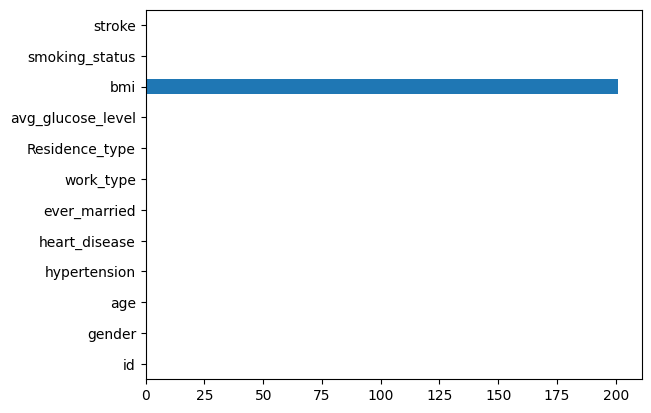

In [2]:
# The dataframe is read from the csv file - healthcare-dataset-stroke-data.csv - taken from kaggle
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

#df.describe()

df.info()
 # To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

### Find the number of NULL values in each column

* Found 201 NULL values in bmi column

In [3]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained


## PRE PROCESSING + EDA

### Gender analysis

% of people who actualy got a stroke :  4.9


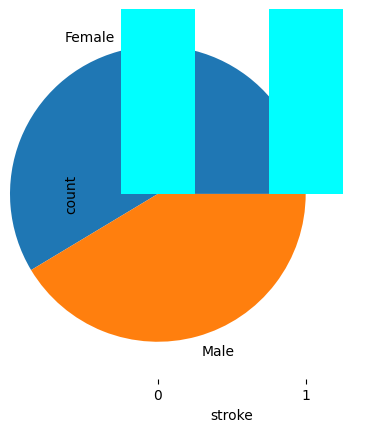

In [4]:
# Checking the values in the gender column
df['gender'].value_counts()
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

# Value count in the stroke attribute
df['stroke'].value_counts()
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)



* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of age

* There are more females as compared to males 

## Target feature - Stroke

* Stroke analysis

* Our dataset is highly skewed since only around 5% of the instances got stroke 
* We will be needing to perform necessary transformations to improve samples of minority class 

### Hyper-tension Analysis

<Axes: xlabel='hypertension'>

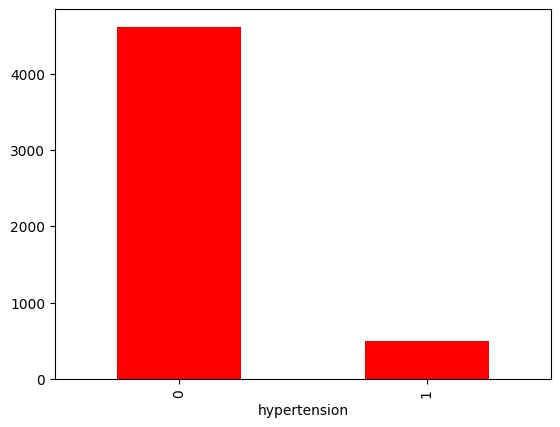

In [5]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

### Work type Analysis

In [6]:
# Value of count of work-type attribute
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

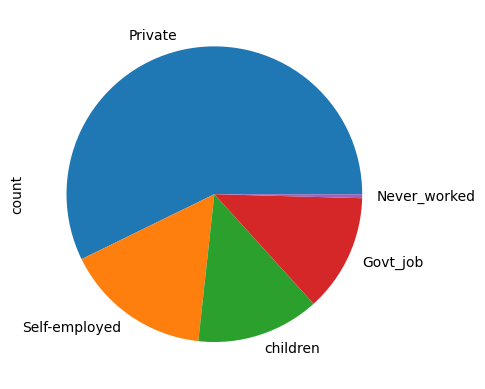

In [7]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

### Smoking status Analysis

In [8]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

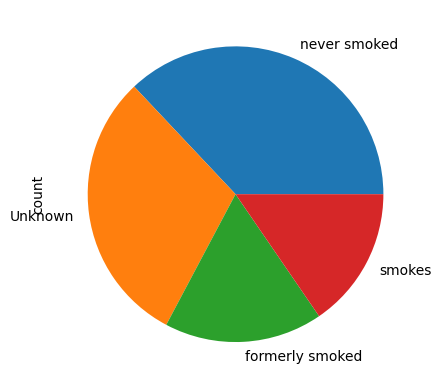

In [9]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

### Residence type Analysis

In [10]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

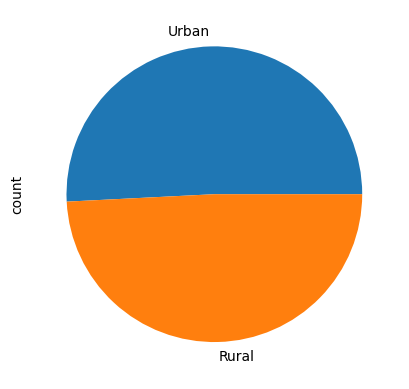

In [11]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

* We have an equal percentage of population who are from Urban and rural areas

### BMI analysis

<Axes: xlabel='bmi', ylabel='Count'>

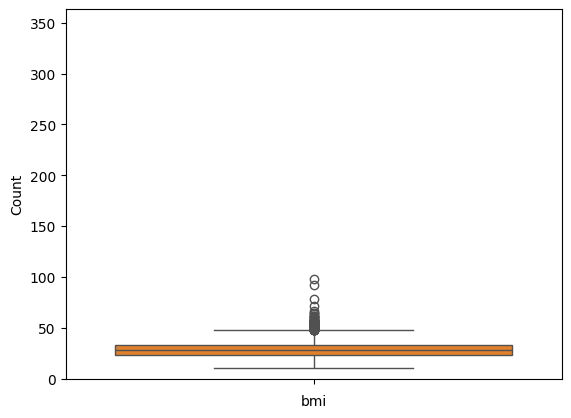

In [12]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])
sns.boxplot(data=df['bmi'])

* We only have N/A values in bmi column - 201 Null values

In [13]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


4.87279843444227

* Bmi is rightly skewed

* Based on the histogram and boxplot we see that there are many outliers in bmi 

* Total outliers in bmi:110
* Total non-outliers in bmi:5000

* NULL values hold 3.93 % of the instances in the dataframe

* Our main target function is stroke And the instances who got a stroke is in the minority - 249  Which is only 4.9 % of the instances

In [14]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249
median of bmi 28.1


* Among the 201 bmi NULL values 40 values in them got stroke 
* Thus we cant drop NULL values 

* Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
* Hence we impute it with median values


### AGE analysis

<Axes: xlabel='age', ylabel='Count'>

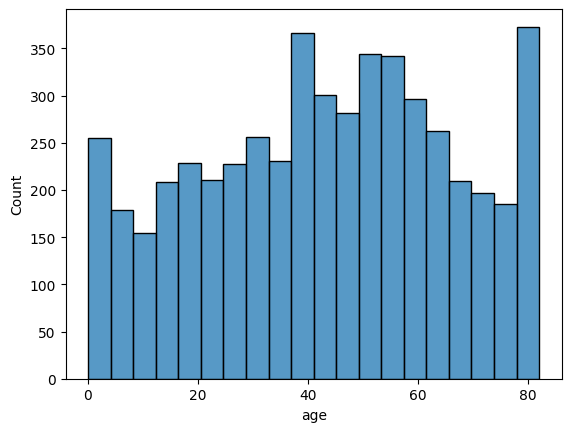

In [15]:
# Graphical representation fo the data in age column
# histogram
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

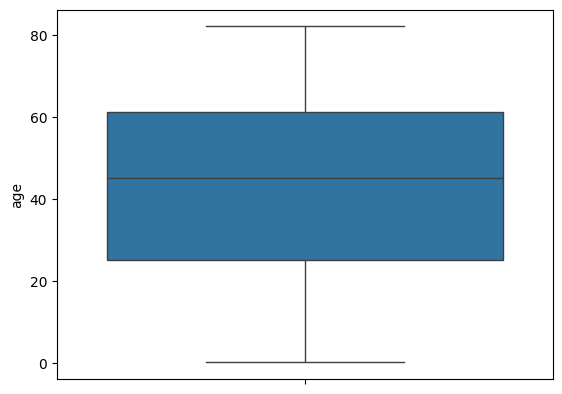

In [16]:
# boxplot
sns.boxplot(data=df['age'])

* The age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL ANALYSIS

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

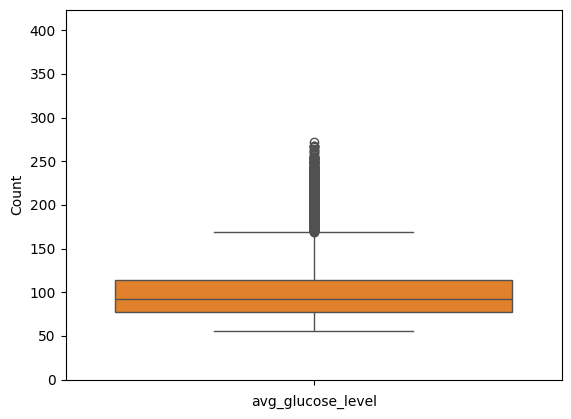

In [17]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

* There are many outliers present based on the boxplot and histogram 
* The data is positively skewed 

In [18]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483

In [19]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
df.describe()
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

ValueError: could not convert string to float: 'Yes'

In [ ]:
df1 = {
"Array_1": [30, 70, 100,90],
"Array_2": [65.1, 49.50, 30.7,77],
    "Array_3":['anuj','45','67','2']
}

data1 = pd.DataFrame(df1)
print(data1)
#print(drop_first)

print(data1.corr())

* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32
* We could not drw any statistical insight from heatmap

### Heart_disease analysis 

<Axes: ylabel='count'>

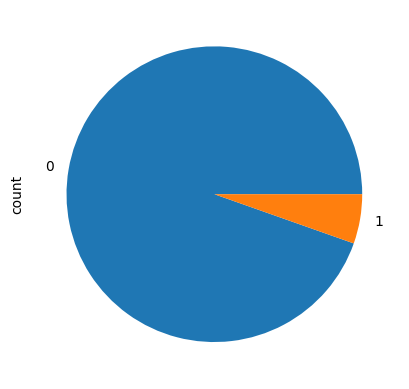

In [20]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()
df['heart_disease'].value_counts().plot(kind="pie")

* This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

### Ever_married analysis with Values

* This result shows that 65.6 % of people from the list are married and 34.4 % are unmarried.

## Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

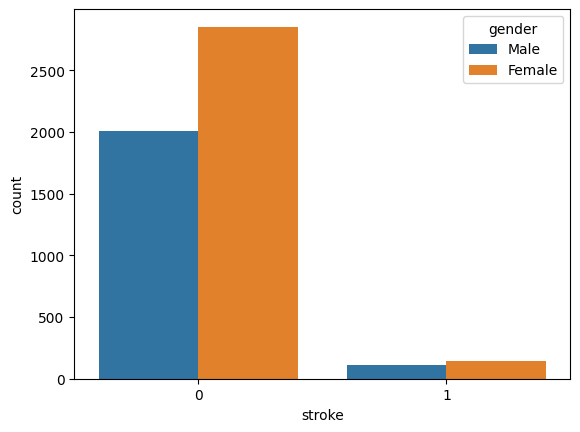

In [21]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

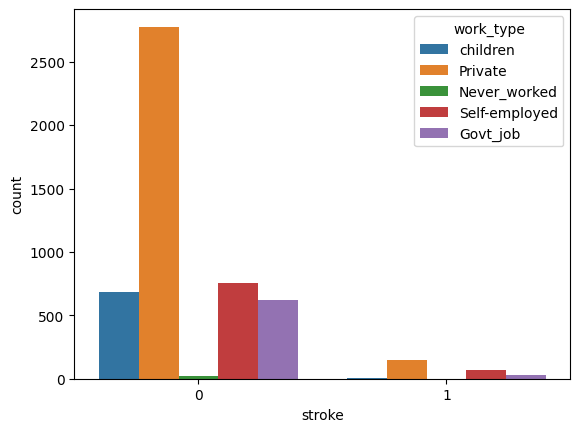

In [22]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

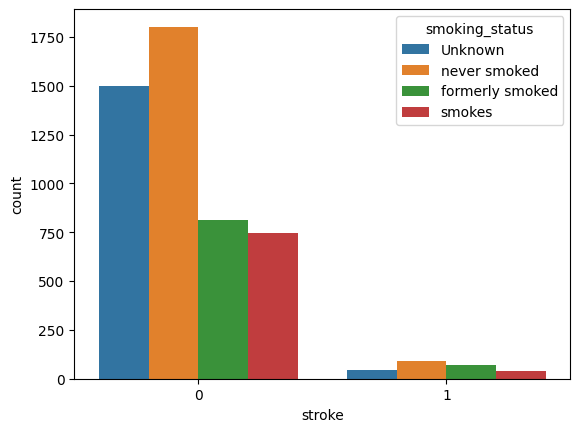

In [23]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

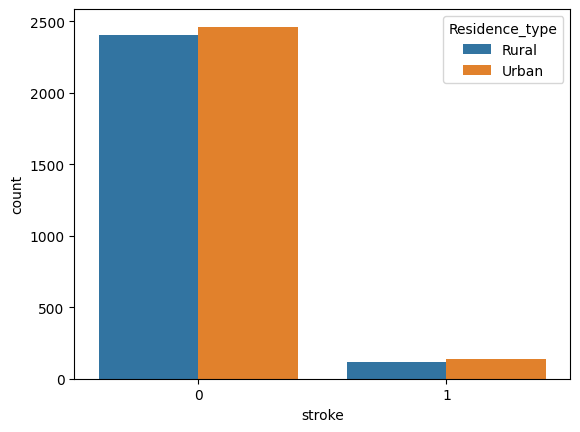

In [24]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

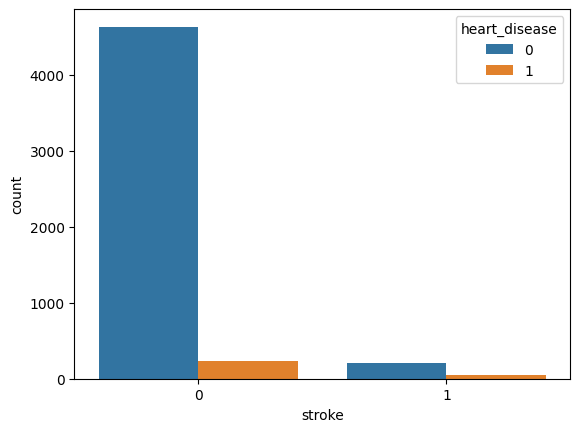

In [25]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

* This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

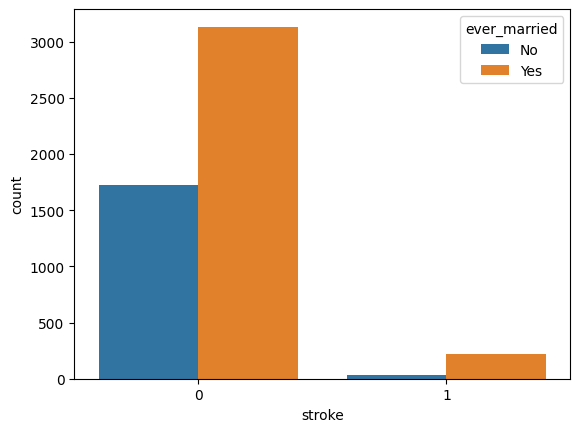

In [26]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

In [27]:
# To know about dummy variable uses
import pandas as pd

con = pd.Series(list('abcba'))
print(con)
print(pd.get_dummies(con))


0    a
1    b
2    c
3    b
4    a
dtype: object
       a      b      c
0   True  False  False
1  False   True  False
2  False  False   True
3  False   True  False
4   True  False  False


* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

### Creating dummy variables for numeric-binary attributes

In [28]:
df.info()
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   gender_Male                     5110 non-null   bool   
 4   hypertension_1                  5110 non-null   bool   
 5   heart_disease_1                 5110 non-null   bool   
 6   ever_married_Yes                5110 non-null   bool   
 7   work_type_Never_worked          5110 non-null   bool   
 8   work_type_Private               5110 non-null   bool   
 9   work_type_Self-employed         5110 non-null   bool   
 10  work_type_children              5110 non-null   bool   
 11  Residence_type_Urban            5110 non-null   bool   
 12  smoking_status_formerly smoked  51

In [30]:
# The data frame after performing dummy attributes
df.head()
df.shape
print(df['stroke_1'].value_counts())
df.info()

stroke_1
False    4861
True      249
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   gender_Male                     5110 non-null   bool   
 4   hypertension_1                  5110 non-null   bool   
 5   heart_disease_1                 5110 non-null   bool   
 6   ever_married_Yes                5110 non-null   bool   
 7   work_type_Never_worked          5110 non-null   bool   
 8   work_type_Private               5110 non-null   bool   
 9   work_type_Self-employed         5110 non-null   bool   
 10  work_type_children              5110 non-null   bool   
 11  Residence_type_Urban            

In [31]:
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

In [32]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
#import imblearn as ib
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
# Performing a minority oversampling
#oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, stratify = y, random_state=100)

print(y_train.shape)
print(y_test.shape)
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)
# Obtaining the oversampled dataframes - testing and training
#X_over, y_over = oversample.fit_resample(X, y)

(4088,)
(1022,)


In [33]:
from imblearn.over_sampling import SMOTE

#counter = Counter(y_train)
print('Before',y_train.shape)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

#counter = Counter(y_train_sm)
#print('After',counter)
print(y_train_sm.shape)

Before (4088,)
(7778,)


In [34]:
from imblearn.over_sampling import ADASYN
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({False: 3889, True: 199})
After Counter({False: 3889, True: 3799})


In [35]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({False: 3889, True: 199})
After Counter({False: 3857, True: 3857})


In [36]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)
print(y_train_sm.shape)

Before Counter({False: 3889, True: 199})
After Counter({False: 3889, True: 3889})
(7778,)


* Scaling the numeric values for bringing them all to the same scale

### Creating test-train split (80-20 split)

In [37]:
'''from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(df.loc[:,df.columns!='stroke_1'], df['stroke_1'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))'''

'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(sampling_strategy=\'minority\')\n\n# fit the object to our training data\nX, y = smote.fit_resample(df.loc[:,df.columns!=\'stroke_1\'], df[\'stroke_1\'])\nprint("Shape of X: {}".format(X.shape))\nprint("Shape of y: {}".format(y.shape))'

In [38]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [39]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-pa

LogisticRegression(C=10.0)

In [41]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[972   0]
 [ 50   0]] 

Classification Report
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       972
        True       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022
 

AUC-ROC
0.8283744855967079


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

In [42]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-pa

LogisticRegression(C=0.04393970560760786)

In [43]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[731 241]
 [ 14  36]] 

Classification Report
              precision    recall  f1-score   support

       False       0.98      0.75      0.85       972
        True       0.13      0.72      0.22        50

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022
 

AUC-ROC
0.822448559670782


In [44]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4088, 15)
y_train: (4088,)
X_test: (1022, 15)
y_test: (1022,)


In [45]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [46]:
from imblearn.over_sampling import SMOTE

#counter = Counter(y_train)
print(X_train.shape)
#print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

#counter = Counter(y_train_sm)
print('After',X_train_sm.shape)

(4088, 15)
After (7778, 15)


## Training Model

### Decision Tree

In [47]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object using the SMOTE
clf = DecisionTreeClassifier()

# Training the classifier
#clf = clf.fit(X_train_ada,y_train_ada)
clf = clf.fit(X_train_sm,y_train_sm)
#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy SMOTE:",metrics.accuracy_score(y_test, y_pred))

# **********************************************************************************
# Create the classifier object Using ADASYN
clf = DecisionTreeClassifier()

# Training the classifier
#clf = clf.fit(X_train_ada,y_train_ada)
clf = clf.fit(X_train_ada,y_train_ada)
#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracy of the model
print("Accuracy ADASYN:",metrics.accuracy_score(y_test, y_pred))

# **********************************************************************************
# Create the classifier object Using ADASYN
clf = DecisionTreeClassifier()

# Training the classifier
#clf = clf.fit(X_train_ada,y_train_ada)
clf = clf.fit(X_train_smtom,y_train_smtom)
#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy SMOTE +TOMEK:",metrics.accuracy_score(y_test, y_pred))
#X_train_sm, y_train_sm
#X_train_smtom, y_train_smtom
#X_train_ada, y_train_ada

Accuracy SMOTE: 0.8894324853228963
Accuracy ADASYN: 0.8874755381604696
Accuracy SMOTE +TOMEK: 0.8796477495107632


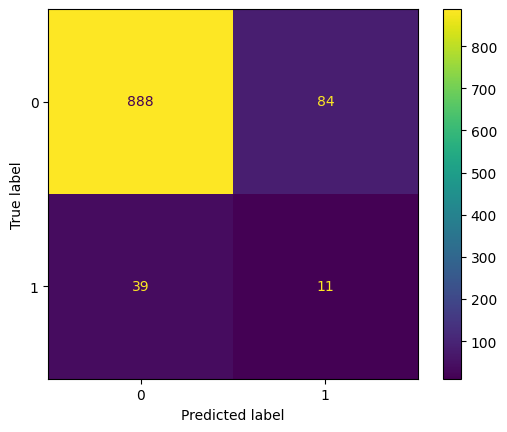

In [48]:
# Plotting the confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

### KNN

In [49]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object With SMOTE METHOD
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train_sm,y_train_sm)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy SMOTE:',accuracy_score(y_test, y_pred_knn))
#print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

# Create the classifier object With ADASYN METHOD
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train_ada,y_train_ada)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy ADASYN:',accuracy_score(y_test, y_pred_knn))
#print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))



# Create the classifier object With SMOTE METHOD
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train_smtom,y_train_smtom)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy SMOTE +TOEK:',accuracy_score(y_test, y_pred_knn))
#print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))
#X_train_sm, y_train_sm

Accuracy SMOTE: 0.8894324853228963
Accuracy ADASYN: 0.8864970645792564
Accuracy SMOTE +TOEK: 0.8845401174168297


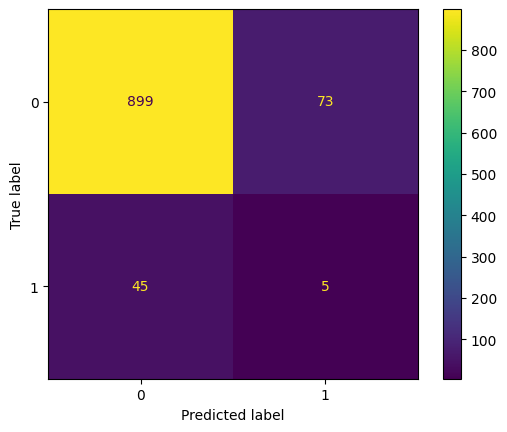

In [50]:
# Plotting the confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)

cm_display = ConfusionMatrixDisplay(cm).plot()

### XGBoost

Accuracy SMOTE: 0.9197651663405088
ROC AUC Score: 0.7631687242798354
Accuracy ADASYN: 0.913894324853229
ROC AUC Score: 0.7800411522633746
Accuracy SMOTE+TOMEK: 0.9080234833659491
ROC AUC Score: 0.7873662551440329


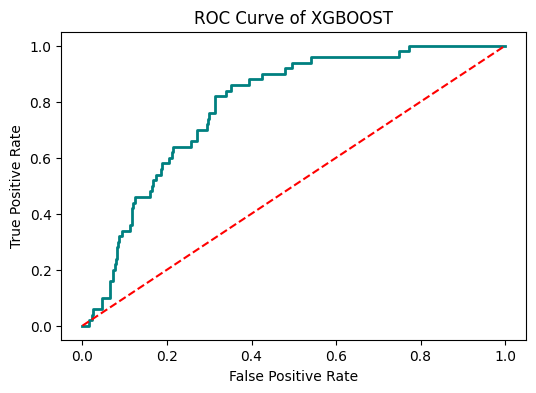

In [51]:
#importing the XGBoost Classifier module
from xgboost  import XGBClassifier

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train_sm,y_train_sm)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy SMOTE:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train_ada,y_train_ada)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy ADASYN:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train_smtom,y_train_smtom)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy SMOTE+TOMEK:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# plots of roc_auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

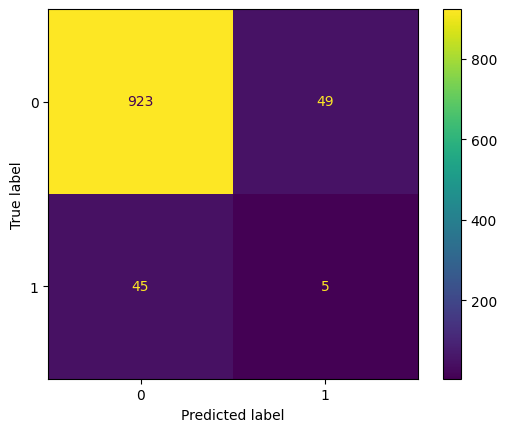

In [52]:
# Plotting the confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_xgb = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [53]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9080234833659491
Precision_score: 0.09259259259259259
Recall_score: 0.1
f1_score: 0.09615384615384615
ROC AUC Score: 0.7873662551440329


### Random Forest

In [54]:

# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
#knn.fit(X_train_smtom,y_train_smtom)
rf_clf.fit(X_train_sm, y_train_sm)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

print('Accuracy of SMOTE:', accuracy_score(y_test, y_pred_rf))


rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
#knn.fit(X_train_ada,y_train_ada)
rf_clf.fit(X_train_ada, y_train_ada)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

print('Accuracy of ADASYN:', accuracy_score(y_test, y_pred_rf))

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets SMOTE_TOM
#knn.fit(X_train_smtom,y_train_smtom)
rf_clf.fit(X_train_smtom, y_train_smtom)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)
# Printing accuracy of the model
print('Accuracy of SMOTE+TOMEK:', accuracy_score(y_test, y_pred_rf))



Accuracy of SMOTE: 0.9070450097847358
Accuracy of ADASYN: 0.910958904109589
Accuracy of SMOTE+TOMEK: 0.9090019569471625


In [55]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X, y, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  94.96989889705884
[0.96875    0.95703125 0.94921875 0.94921875 0.95703125 0.97265625
 0.93359375 0.92578125 0.96484375 0.95703125 0.94509804 0.92941176
 0.94901961 0.94117647 0.94509804 0.95294118 0.94509804 0.96862745
 0.96862745 0.91372549]


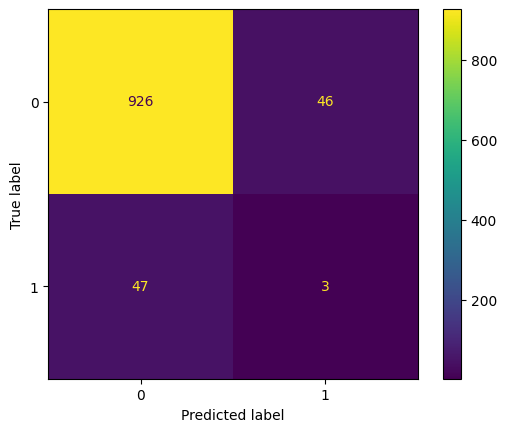

In [57]:
# Plotting the confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_rf = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

cm_display = ConfusionMatrixDisplay(cm).plot()

### Logistic regression

In [58]:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sm, y_train_sm)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy SMOTE:', accuracy_score(y_test, y_pred_lr))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_ada, y_train_ada)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy ADASYN:', accuracy_score(y_test, y_pred_lr))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_smtom, y_train_smtom)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy SMOTE+TOMEK:', accuracy_score(y_test, y_pred_lr))

Accuracy SMOTE: 0.7563600782778865
Accuracy ADASYN: 0.7485322896281801
Accuracy SMOTE+TOMEK: 0.7553816046966731


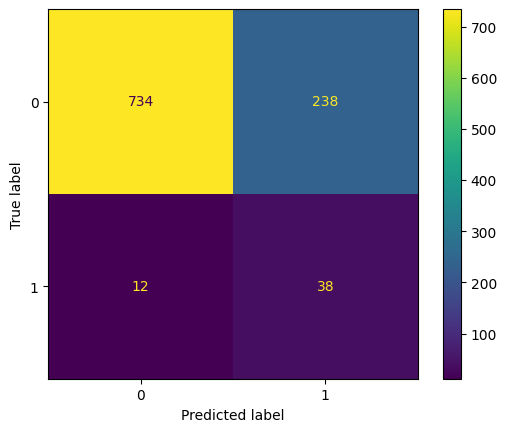

In [59]:
# Plotting the confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_lr = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [60]:
# Making sample predictions based on manual value entry
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1	
work_type_Never_worked=0	
work_type_Private=1	
work_type_Self_employed=0
work_type_children=0	
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


True


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [61]:
# For the front end 
import pickle

with open('model.pickle','wb') as f:
  pickle.dump(rf_clf,f)